## <div align="center">Fixed Point and Floating Point </div>

### Table of contents:
1. Introduction
2. Experiment with a low-pass filter. Functions are assigned.
3. Experiment with a low-pass filter is simulated.
4. Conclsuion

## <div align="center">Part 1. Introduction. </div>

In the following part the FIR filter and the process of applying fixed and floating point are introduced.

**GAOLS**: 

- Implement low-pass filter with different numerical systems in order to observe what is the defference in output of the FIR filter. 
- Analyse filtered signals graphically
- Analyse execution time
- Analyse errors.

In [41]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from FixedPoint import FXnum, FXfamily
import math
import time


## <div align="center">Part 2. Experiment with a low-pass(FIR) filter. Functions are assigned. </div>

For the experiment low-pass filter is chosen and pseudo code is taken from wikipedia. 
First, the original signal is created and converted to fixed and/or floating points. 
Then the signal iterates inside the loop where main formula is applied with coefficients. The filtered signal is stored and returned.

<img src="pseudocode.png" alt="Alt text" width="500" height="300" align="center">

Source:
- https://stackoverflow.com/questions/62448904/how-to-implement-continuous-time-high-low-pass-filter-in-python
- https://en.wikipedia.org/wiki/Low-pass_filter
- https://helpful.knobs-dials.com/index.php/Low-pass_filter

There're two version of the algorithm: one for Fixed point and one for Floating point. It is done this way because FixedPoint library implies some restriction which make it sometimes difficult to implement, and in order to same time the code is duplicated with minor changes. Of course there would be a need to scale up the algorithm another solution should be found.


### FLOATING POINT

In [42]:
# FIR filter f4-32bit, f8-64bit, f16-128bit

# Function to filter a signal based on the bit size of the input signal
def filter_signal_floating(bits): 
    
    start_time = time.time() # Start timer to measure execution time
    err = [] # Store errors, by comparing original signal and filtered.
    
    # Define filter coefficients based on the bit size of the input signal
    if bits == 64: # If 64 bits
        
        RC = np.float64(1/(2 * math.pi * 2)) # Constant 1
        dt = 0.01  # Sampling interval
        alpha = np.float64((dt / (RC + dt))) # Coefficient for the filter

        # Define input signal
        t = [] #  store time values
        x = [] #  store input signal values
        for i in range(1000):
            t.append(i*dt) # add time to the list
            
            # Calculate original signal
            sig = math.cos(2*math.pi*0.5*t[i]) + 0.2*math.sin(2*math.pi*2.5*t[i]+0.1) + 0.2*math.sin(2*math.pi*15.3*t[i])
            x.append(np.float64(sig))
            
    elif bits == 128: # If 128 bits
        RC = np.float128(1/(2 * math.pi * 2))
        dt = 0.01  # Sampling interval
        alpha = np.float128((dt / (RC + dt)))

        # Define input signal
        t = [] 
        x = [] 
        for i in range(1000):
            t.append(i*dt)
            sig = math.cos(2*math.pi*0.5*t[i]) + 0.2*math.sin(2*math.pi*2.5*t[i]+0.1) + 0.2*math.sin(2*math.pi*15.3*t[i])
            x.append(np.float128(sig))
            
    else: # gives floating point set by default in Python
        RC = 1/(2 * math.pi * 2)  # Time constant for the filter
        dt = 0.01  # Sampling interval
        alpha = dt / (RC + dt)

        # Define input signal
        t = []
        x = []
        for i in range(1000):
            t.append(i*dt)
            sig = math.cos(2*math.pi*0.5*t[i]) + 0.2*math.sin(2*math.pi*2.5*t[i]+0.1) + 0.2*math.sin(2*math.pi*15.3*t[i])
            x.append(sig)
            

    # Apply the filter to the input signal
    filtered_signal = []
    previous_value = 0
    for i in range(1000):
        filtered_value = alpha * x[i] + (1 - alpha) * previous_value # filtered output calculated with weighted moving average
        filtered_signal.append(filtered_value) # Store
        previous_value = filtered_value
        error = x[i] - filtered_value # Calculate the error between the input signal and the filtered output
        err.append(error) # Store

    end_time = time.time() # Save the end time
    execution_time1 = end_time - start_time # Find the execution time
    
    return t, x, filtered_signal, execution_time1, err

### FIXED POINT

In [43]:
# Function to filter a signal based on the bit size of the input signal
def filter_signal_fixed(n_bits,n_intbits):
    start_time2 = time.time() # Start timer to measure execution time

    # Create a FIXED point number family for the input signal and define the number of bits and integer bits
#     try1 = FXfamily(n_bits=8, n_intbits=12)
    try1 = FXfamily(n_bits=n_bits, n_intbits=n_intbits)

    # Define filter coefficients
    RC2 = 1/(2 * math.pi * 2)  # Constant 1
    dt2 = 0.01  # Sampling interval
    alpha2 = dt2 / (RC2 + dt2) # # Coefficient for the filter
    err = []  # Store errors, by comparing original signal and filtered.

    # Define input signal
    t2 = [] #  store time values
    x2 = [] #  store input signal values
    for i in range(1000):
        t2.append(i*dt2) # add time to the list
        
        # Calculate original signal
        sig = math.cos(2*math.pi*0.5*t2[i]) + 0.2*math.sin(2*math.pi*2.5*t2[i]+0.1) + 0.2*math.sin(2*math.pi*15.3*t2[i])
        x2.append(FXnum(sig, try1))

    

    # Apply the filter to the input signal
    filtered_signal_2 = []
    previous_value2 = 0
    for i in range(1000):
        filtered_value = alpha2 * x2[i] + (1 - alpha2) * previous_value2 # filtered output calculated with weighted moving average
        filtered_signal_2.append(filtered_value)
        previous_value2 = filtered_value
        error = x2[i] - filtered_value # Calculate the error between the input signal and the filtered output
        err.append(error)
        
    end_time2 = time.time() # Save the end time
    execution_time2 = end_time2 - start_time2 # Find the execution time
        
    return t2, x2, filtered_signal_2, execution_time2,  err      

Intially the function was short, but it became bulky. It has to modes and they can be changed by "signal_error" parameter.
If i give "signal_error"  = "signal" then the function will plot 2 graphs "original signal and filtered signal full" and same scaled up.
In other cases the function will plot comparison of the errors.

**This function allows to get rid of repetitions.**

In [44]:
# Function for plotting signal
def plot_signal(t, original, filtered, title, signal_error):
    
    # If statment leads to signal plotting
    if signal_error == "signal":
        
        # Assifn subplots
        fig, ax = plt.subplots(1, 2, figsize=(15, 4))
        
        # Plot original and filtered signal
        ax[0].plot(t, original, label='Original Signal') # Original sig
        ax[0].plot(t, filtered, label='Filtered Signal', linewidth = 3) # Filtered sig
        ax[0].set_xlabel('Time (s)', fontsize=14)
        ax[0].set_ylabel('Amplitude', fontsize=14)
        ax[0].set_title(f"{title} Original", fontsize=15) 
        ax[0].legend()
        ax[0].legend(fontsize=15)
        ax[0].grid(True) # Add grids, it looks better

        # Same data is given but X-axis is zoomed in.
        ax[1].plot(t, original, label='Original Signal')
        ax[1].plot(t, filtered, label='Filtered Signal', linewidth = 3)
        ax[1].set_xlabel('Time (s)', fontsize=14)
        ax[1].set_ylabel('Amplitude', fontsize=14)
        ax[1].set_title(f"Zoom In", fontsize=15)
        ax[1].set_xlim([9, 11])
        ax[1].legend()
        ax[1].legend(fontsize=15)
        ax[1].grid(True)
    
        # Adjust the size of the subplots in % precentage
        ax[0].set_position([0, 0, 0.67, 1])
        ax[1].set_position([0.7,0, 0.3, 1])
#         ax[0].set_position([0, 0, 0.35, 1])
#         ax[1].set_position([0.38, 0, 0.3, 1])
    
    # Else statment leads to Error plotting
    else:
        
        # Assign subplots
        fig, ax = plt.subplots(1, 2, figsize=(15, 4))
        
        # Plot comparison between 32-bit float error against chosen error.
        ax[0].plot(t, original, label='Error for Floating Point 32', linewidth = 1)
        ax[0].plot(t, filtered, label=f'Error for {signal_error}', linewidth = 1)
        ax[0].set_xlabel('Time (s)', fontsize=14)
        ax[0].set_ylabel('Amplitude', fontsize=14)
        ax[0].set_title(f"Error for filtered signal {title}", fontsize=14)
        ax[0].legend()
        ax[0].legend(fontsize=15)
        ax[0].grid(True)
        
        # Plot onlt one error.
        ax[1].plot(t, filtered, label=f'{signal_error}', linewidth = 1)
        ax[1].set_xlabel('Time (s)', fontsize=14)
        ax[1].set_ylabel('Amplitude', fontsize=14)
        ax[1].set_title(f"Error for filtered signal {signal_error}", fontsize=14)
#         ax[1].set_xlim([9, 11])
        ax[1].legend()
        ax[1].legend(fontsize=15)
        ax[1].grid(True)



## <div align="center">Part 3. Experiment with a low-pass(FIR) filter is simulated. </div>

## Data 1. Signals. 
In the following original signals agains filtered signals with fix and floating point compared.

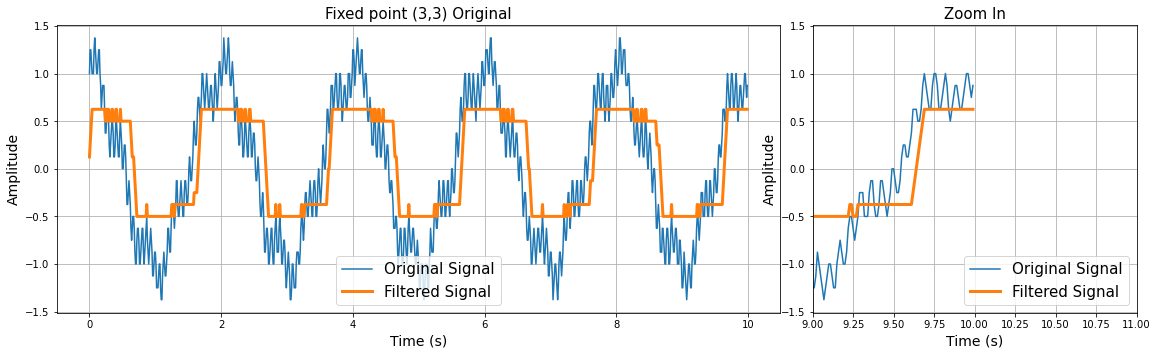

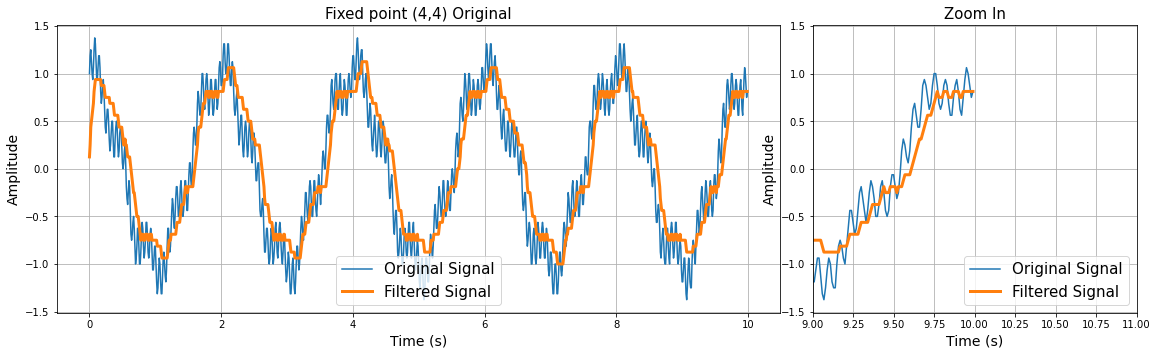

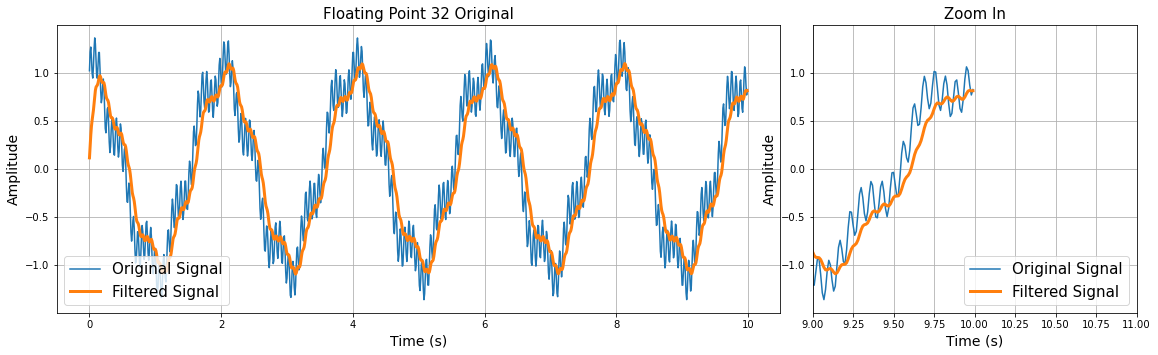

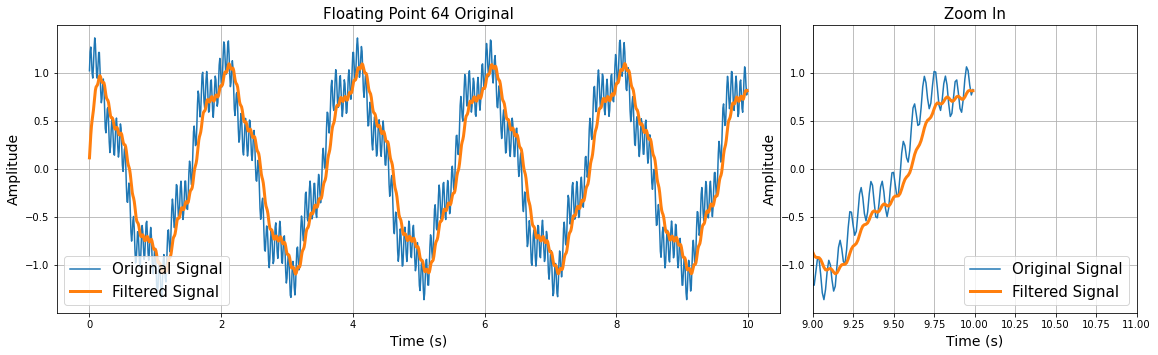

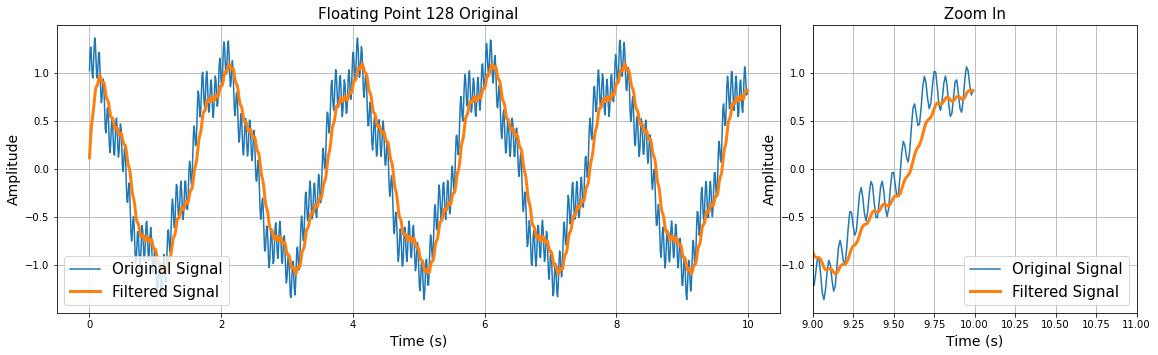

In [45]:

t1, x1, filtered_signal_1, execution_time1, err1 = filter_signal_fixed(3,3)
plot_signal(t1, x1, filtered_signal_1, "Fixed point (3,3)", "signal")

t2, x2, filtered_signal_2, execution_time2, err2 = filter_signal_fixed(4,4)
plot_signal(t2, x2, filtered_signal_2, "Fixed point (4,4)", "signal")

t4, x4, filtered_signal_4, execution_time4, err4 = filter_signal_floating(32)
plot_signal(t4, x4, filtered_signal_4, "Floating Point 32", "signal")

t3, x3, filtered_signal_3, execution_time3, err3 = filter_signal_floating(64)
plot_signal(t3, x3, filtered_signal_3, "Floating Point 64", "signal")

t5, x5, filtered_signal_5, execution_time5, err5 = filter_signal_floating(128)
plot_signal(t5, x5, filtered_signal_5, "Floating Point 128", "signal")

- Filtered signals fixed point with 3 and 4 bits are more linear and less smooth. Because of the low precision and the error in process is accumulating during cimputation. When these filtered signals compared with the original signal it is easy to notice the accuracy is of filtering is low.
- Floating point filtered signals appear to be smooth and very close to the original signals which indicates high accuracy and high precision.

## Data 2. Execution time.
The execution time of different numerical systems is confirmed.

In [46]:
print("Execution time fixed point (3,3) :", execution_time1)
print("Execution time fixed point (4,4) :", execution_time2)
print("Execution time floating point 32 :", execution_time4)
print("Execution time floating point 64 :", execution_time3)
print("Execution time floating point 128:", execution_time5)

Execution time fixed point (3,3) : 0.01111912727355957
Execution time fixed point (4,4) : 0.009036064147949219
Execution time floating point 32 : 0.0010900497436523438
Execution time floating point 64 : 0.001421213150024414
Execution time floating point 128: 0.002544879913330078


- The experiments shows that floating point is faster. The reason why is that the programming language and libraries that are used affect the time of the fixed and floating point. Particulary, Numpy library make floating point faster and Python "list" for fixed point work slow. 
- From the observation of floating point 32, 64 and 128-bit it is clear that the more bits are given the more it is computationally costly and more time required.

## Data 3. Comparison of the values to a Reference.
In this experiment Reference is Floating point 32.

In [47]:
for  sig_4, sig_1, sig_2, sig_3, sig_5 in zip(filtered_signal_4, filtered_signal_1, filtered_signal_2, filtered_signal_3, filtered_signal_4):
    print(f" REFERENCE - Floating 32-nit: {sig_4}, Fixed 3-bit: {sig_1}, Fixed 4-bit: {sig_2}, Floating 64-bit: {sig_3}, Floating 128: {sig_5}")
    print("")

 REFERENCE - Floating 32-nit: 0.11386419662517336, Fixed 3-bit: 0.12, Fixed 4-bit: 0.125, Floating 64-bit: 0.11386419662517336, Floating 128: 0.11386419662517336

 REFERENCE - Floating 32-nit: 0.23671698715382233, Fixed 3-bit: 0.25, Fixed 4-bit: 0.25, Floating 64-bit: 0.23671698715382233, Floating 128: 0.23671698715382233

 REFERENCE - Floating 32-nit: 0.35164996959185446, Fixed 3-bit: 0.37, Fixed 4-bit: 0.437, Floating 64-bit: 0.35164996959185446, Floating 128: 0.35164996959185446

 REFERENCE - Floating 32-nit: 0.4412931643650381, Fixed 3-bit: 0.5, Fixed 4-bit: 0.5, Floating 64-bit: 0.4412931643650381, Floating 128: 0.4412931643650381

 REFERENCE - Floating 32-nit: 0.5031986274311474, Fixed 3-bit: 0.62, Fixed 4-bit: 0.562, Floating 64-bit: 0.5031986274311474, Floating 128: 0.5031986274311474

 REFERENCE - Floating 32-nit: 0.5523416461323354, Fixed 3-bit: 0.62, Fixed 4-bit: 0.625, Floating 64-bit: 0.5523416461323354, Floating 128: 0.5523416461323354

 REFERENCE - Floating 32-nit: 0.608

- Numerical conformation of the graphs shown above. Numbers and graphs have the same trends.

## Data 3: Error
Here Filtered Signal of Float 32 is compared to it all the other filtered signals. As a result, it can be seen that Fixed points have higher values of an error.

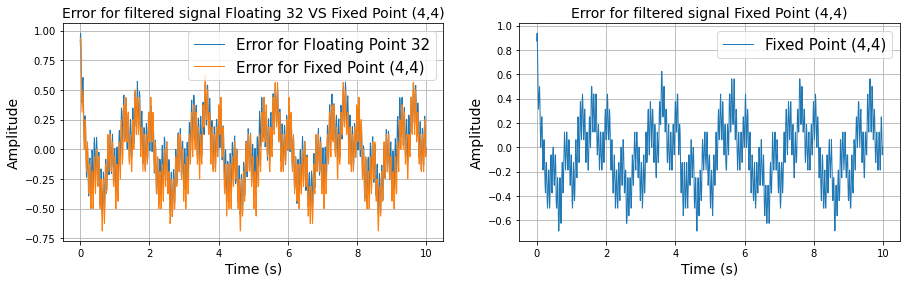

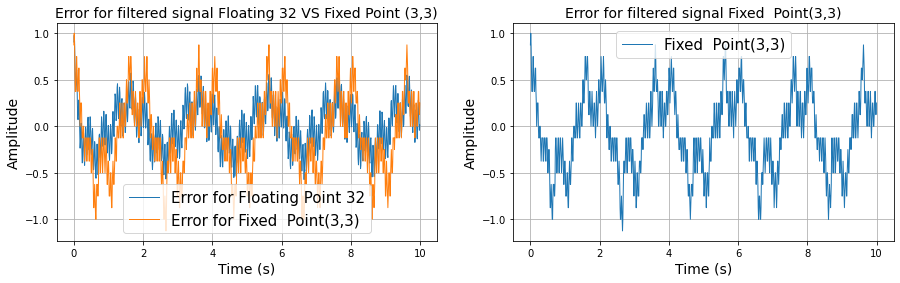

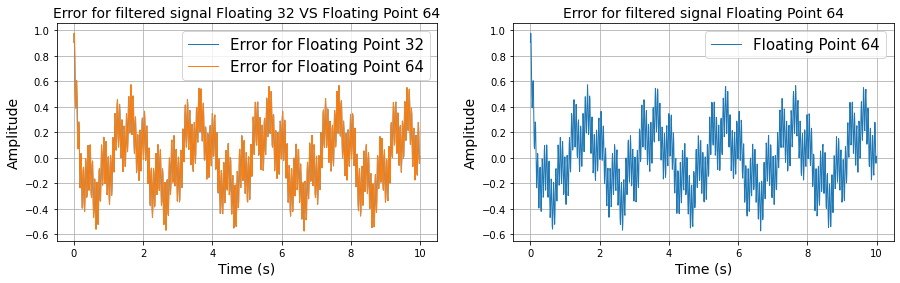

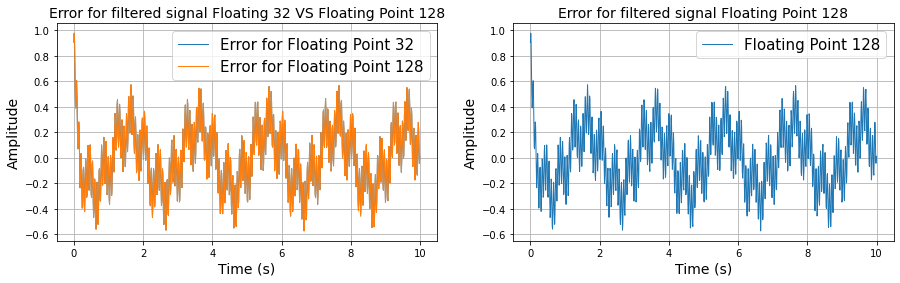

In [48]:
plot_signal(t4, err4, err2, "Floating 32 VS Fixed Point (4,4)", "Fixed Point (4,4)")
plot_signal(t4, err4, err1, "Floating 32 VS Fixed Point (3,3)", "Fixed  Point(3,3)")
plot_signal(t4, err4, err3, "Floating 32 VS Floating Point 64", "Floating Point 64")
plot_signal(t4, err4, err5, "Floating 32 VS Floating Point 128", "Floating Point 128")


- As a result, there is no visually recognizable difference in errors when compare 32-bit to floating point 64 and 128-bit. However, fixed point compared to floating point 32-bit show the difference in errors, which is due to level of precision.

## <div align="center">Part 4. Conclusion. </div>

### In this particular exeriment:
- Floating point is more presice than fixed point. It has smaller error.
- Due to usage of Numpy and limitations of class "list" flaoting point is faster. However, in hardware and low level languages Fixed point would be faster.